In [4]:
import os
import sys
import numpy as np
from Dataset import get_dataset, preprocessing, tokenizer, create_label
from Model.mnb import MultinomialNaiveBayes
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
reviews_df, wines_df, users_df, full_df = get_dataset()

C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:63: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv(path + "\\full_dataset.csv")


In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636956 entries, 0 to 1636955
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1636956 non-null  object 
 1   Year         1595987 non-null  object 
 2   Wine ID      1636956 non-null  int64  
 3   User Rating  1636956 non-null  float64
 4   Note         1636946 non-null  object 
 5   CreatedAt    1636956 non-null  object 
 6   User         1636946 non-null  object 
 7   Winery       1636956 non-null  object 
 8   Rating       1636956 non-null  float64
 9   Country      1636956 non-null  object 
 10  Region       1635823 non-null  object 
 11  Price        1636956 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 149.9+ MB


In [5]:
reviews_df.info(), wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630246 entries, 0 to 1630245
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1630246 non-null  object 
 1   Year         1589277 non-null  object 
 2   Wine ID      1630246 non-null  int64  
 3   User Rating  1630246 non-null  float64
 4   Note         1630236 non-null  object 
 5   CreatedAt    1630246 non-null  object 
 6   User         1630236 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 87.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1798 non-null   object 
 1   Year        1794 non-null   object 
 2   Wine ID     1798 non-null   int64  
 3   Wine        1798 non-null   object 
 4   Rating      1798 non-null   float64
 5   num_review  1798 non-null   int

(None, None)

In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49297 entries, 0 to 49296
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     49297 non-null  object
 1   Bio      8886 non-null   object
 2   Country  49297 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


Data Visualization

<AxesSubplot: >

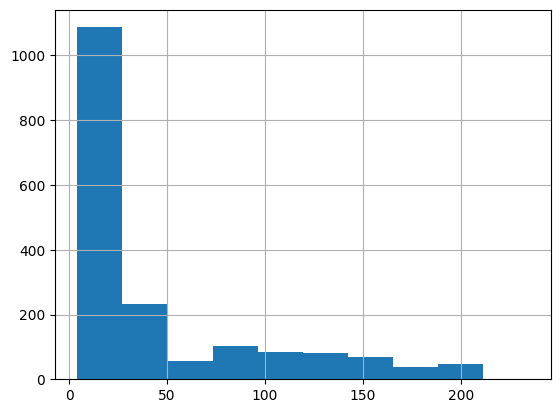

In [6]:
wines_df['Price'].hist()


<AxesSubplot: ylabel='Wine'>

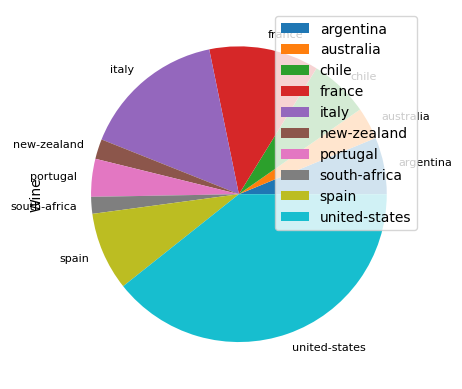

In [7]:
wines_df.groupby(['Country']).count()[wines_df.groupby(['Country']).count()['Wine']>20].plot(kind='pie', y='Wine',fontsize=8)


<AxesSubplot: >

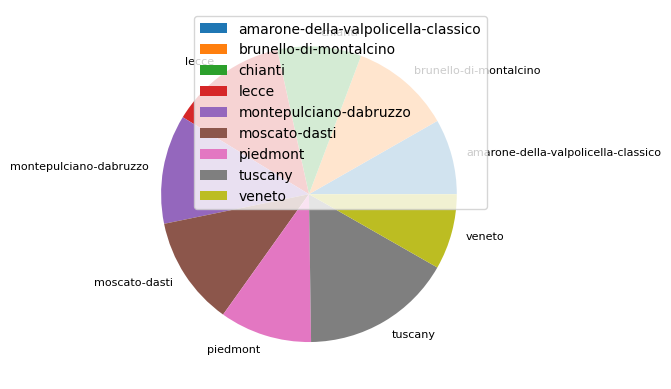

In [8]:
geo_area_it = wines_df[wines_df['Country']=='italy'].groupby(['Region']).count()

geo_area_it[geo_area_it['Wine']>8].plot(kind='pie', y='Wine',fontsize=8,label="")

<AxesSubplot: ylabel='User'>

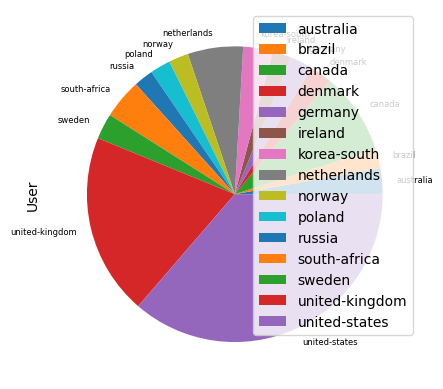

In [9]:
users_df.groupby(['Country']).count()[users_df.groupby(['Country']).count()['User']>700].plot(kind='pie', y='User', fontsize=6,rot=20)


Rating distribution - Sentiment

<AxesSubplot: >

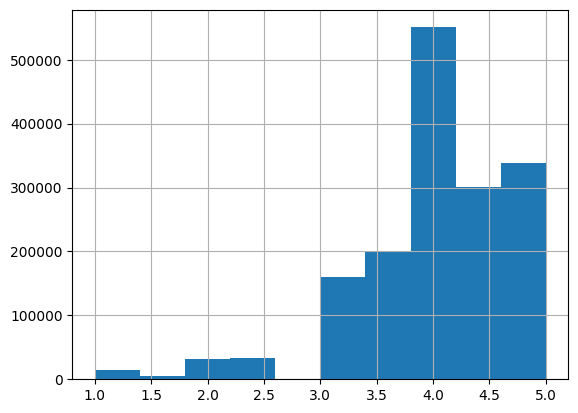

In [10]:
full_df["User Rating"].hist()

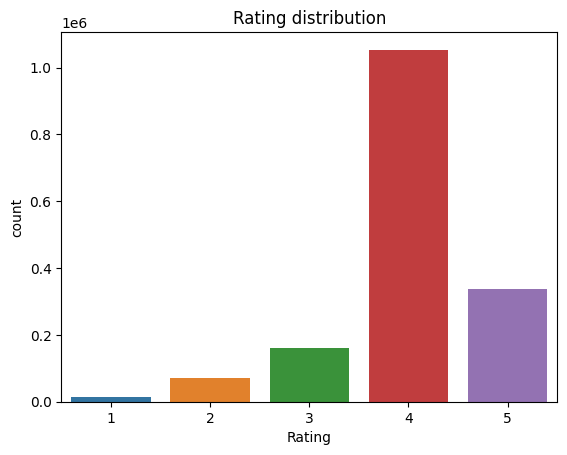

In [11]:
full_df["int_Rating"] = full_df["User Rating"].apply(round)

f = sns.countplot(x='int_Rating', data=full_df)
f.set_title("Rating distribution")
plt.xlabel("Rating");

In [13]:
neg = full_df[full_df["User Rating"]<3.7].Wine.count()
pos = full_df[full_df["User Rating"]>4].Wine.count()
neutr = full_df.Wine.count()-pos - neg
neg, neutr,pos

(440702, 552616, 643638)

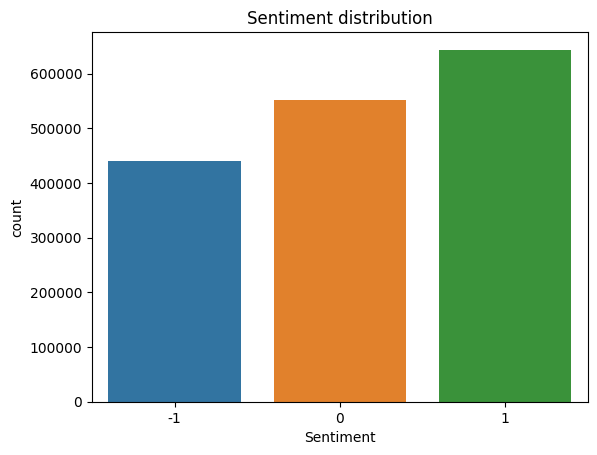

In [21]:
full_df['Sentiment']=full_df['User Rating'].apply(lambda f: create_label(f))

f = sns.countplot(x='Sentiment', data=full_df)
f.set_title("Sentiment distribution")
plt.xlabel("Sentiment");


Data Processing - Cleaning

In [15]:
full_df['Note-PreProcessed']=full_df['Note'].apply(lambda f: preprocessing(f))
full_df['Note-Tokenized']=full_df['Note'].apply(lambda f: tokenizer(f))

In [16]:
full_df['Note-test']=full_df['Note-PreProcessed'].apply(lambda f: str(f))

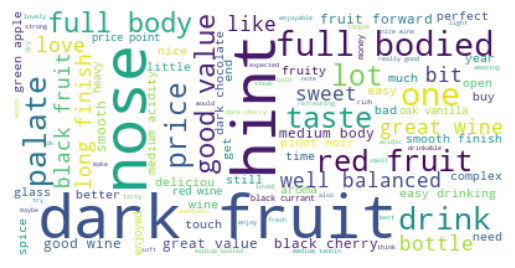

In [17]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
text = " ".join(t for t in full_df["Note-PreProcessed"])


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

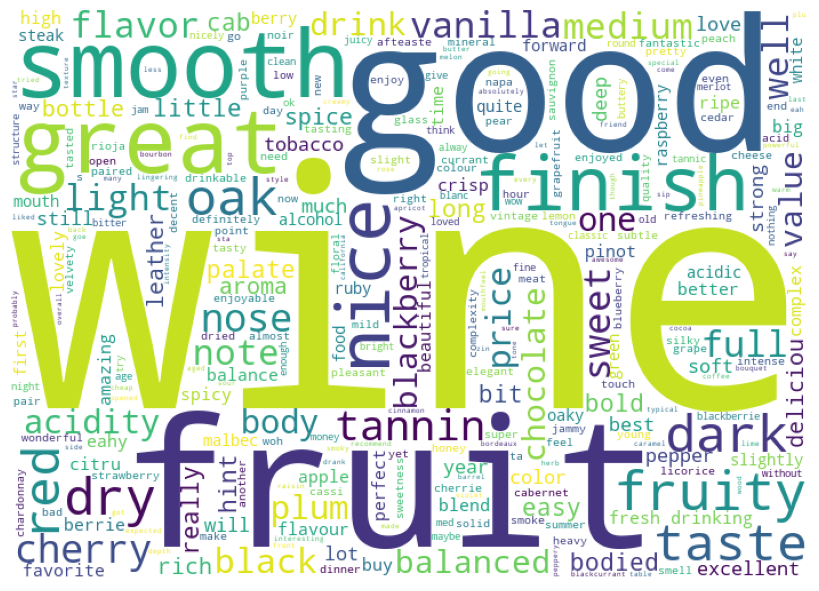

In [18]:
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(text)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [91]:
from sklearn.model_selection import train_test_split
X, y = full_df['Note-Tokenized'], full_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [93]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(np.array([-1,0,1]))
).fit(X_train.values, y_train.values)

In [94]:
y_hat = MNB.predict(X_test.values)

In [95]:
acc = np.sum(np.equal(y_test.values, y_hat)) / len(y_test)
acc

0.5714617339458509

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.67      0.52      0.58     90034
           0       0.47      0.36      0.41    108630
           1       0.58      0.79      0.67    128728

    accuracy                           0.57    327392
   macro avg       0.57      0.56      0.55    327392
weighted avg       0.57      0.57      0.56    327392



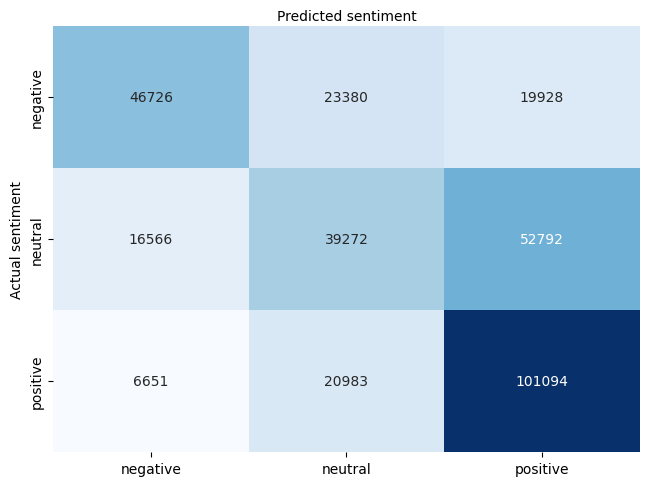

In [210]:
cnf_matrix = confusion_matrix(y_test, y_hat)

import seaborn as sns
class_names = ["negative", "neutral", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

In [211]:
sentiments = pd.DataFrame({'pred' : y_hat, 'true' : y_test})

In [212]:
pred=sentiments.groupby(by="pred").count()
true=sentiments.groupby(by="true").count()
sentiments_distr=true.join(pred)

<AxesSubplot: xlabel='true'>

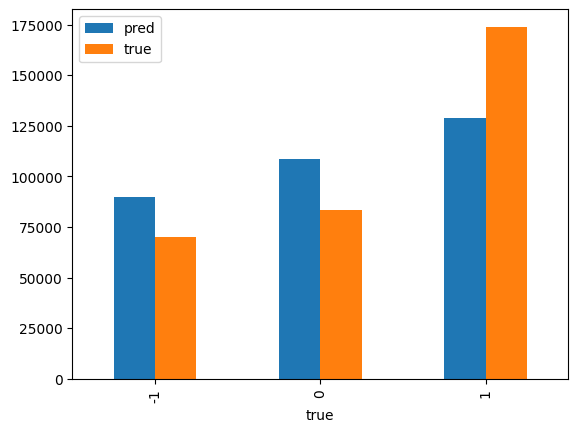

In [213]:
sentiments_distr.plot(kind='bar')